<img src="https://d1rwhvwstyk9gu.cloudfront.net/2020/08/Gold-Price-Prediction-Using-Machine-Learning-In-Python-OG.png">


This notebook aims to predict the future value of gold prices using machine learning techniques. The dataset provided contains historical gold prices and other relevant financial information. The notebook will first perform exploratory data analysis to gain insights on the data, then feature engineering and cleaning to prepare the data for modeling. After that, different machine learning models  will be trained and compared for the gold price prediction. The performance of the models will be evaluated using metrics such as mean squared error and root mean squared error. The notebook will also include a section of visualizing the results and prediction for future gold prices. The best performing model will be saved and used for making predictions on unseen data.

Table of Contents:
1. Importing Libraries
2. Reading Data and Inspecting it
3. Information about data
4. Handling missing values 
5. Data visualization
6. Corelation
7. Splite Data set
8. creating model
9. Evaluate data model


<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Importing Libraries
    </h1>
</div>

In [120]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import style
%matplotlib inline

<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Reading Data and Inspecting it
    </h1>
</div>

In [121]:
data_set = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
data_set.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [122]:
data_set.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [123]:
data_set.shape

(2290, 6)

<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Information about data
    </h1>
</div>

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [124]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [125]:
data_set.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Handling missing values
    </h1>
</div>

In [126]:
data_set.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There are no missing values so we don't need to do anything

<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Data visualization
    </h1>
</div>

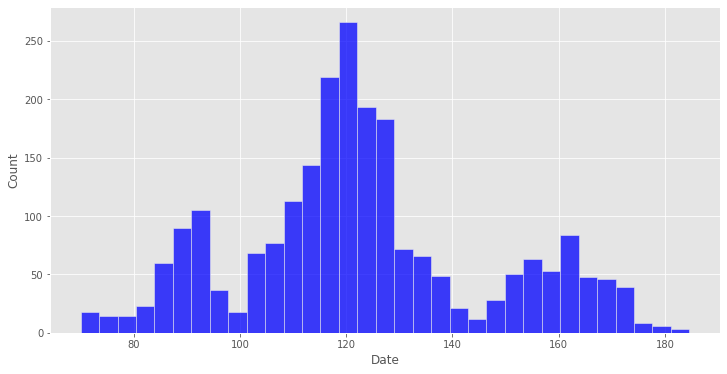

In [127]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.histplot(data_set['GLD'],color='Blue')
plt.xlabel('Date')
plt.show()

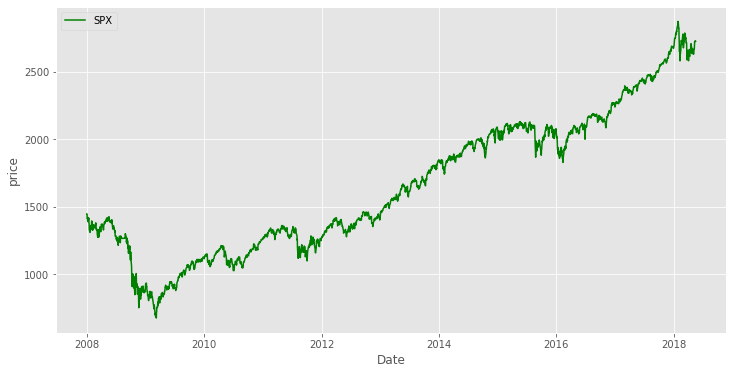

In [128]:
style.use('ggplot')
data_set1 = data_set.copy()
data_set1.Date = pd.to_datetime(data_set1['Date'])
data_set1.set_index('Date')
plt.figure(figsize=(12,6))
plt.plot(data_set1['Date'].values,data_set1['SPX'],color='green',label='SPX')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()


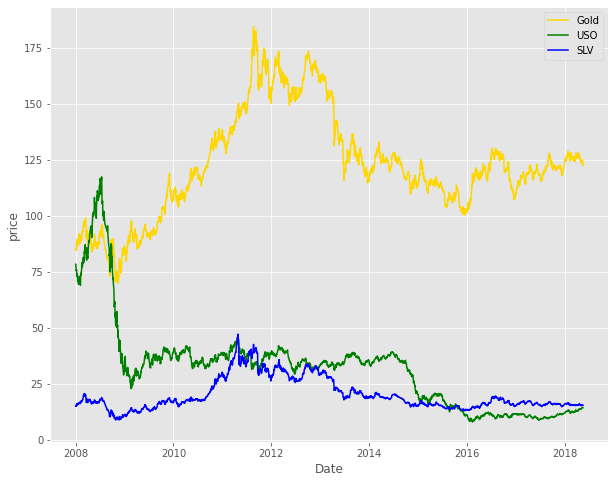

In [129]:
style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(data_set1['Date'].values,data_set1['GLD'],color='gold',label='Gold')
plt.plot(data_set1['Date'].values,data_set1['USO'],color='green',label='USO')
plt.plot(data_set1['Date'].values,data_set1['SLV'],color='Blue',label='SLV')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

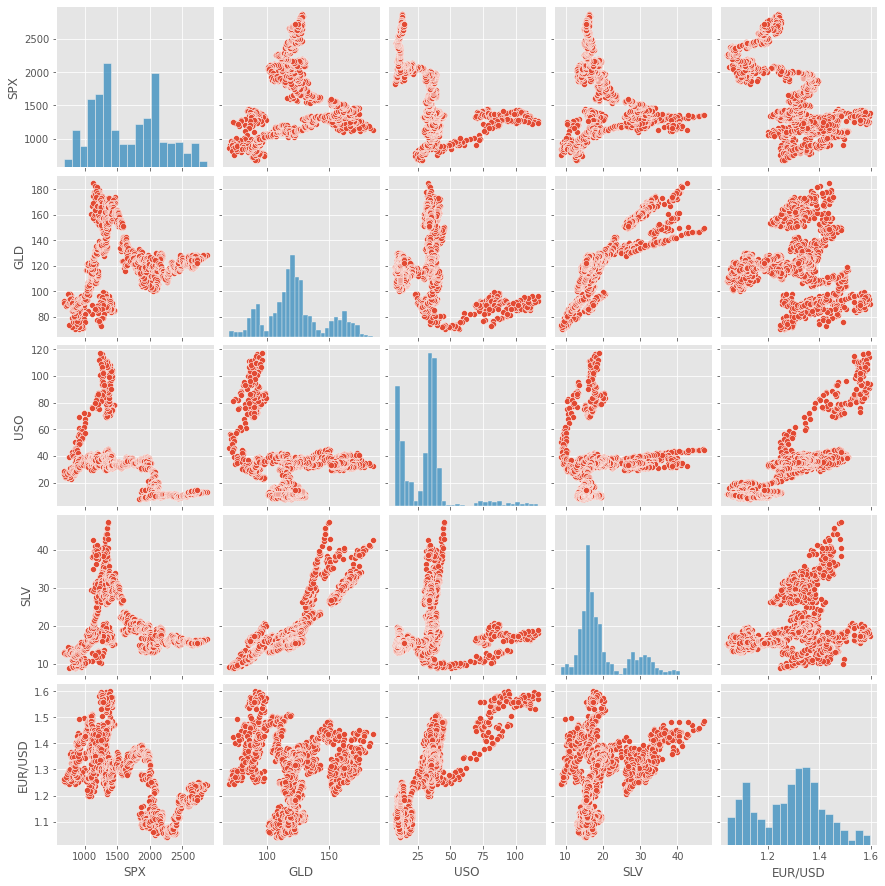

In [130]:
style.use('ggplot')
sns.pairplot(data_set)

<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Corelation
    </h1>
</div>

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

In [131]:
corellation = data_set.corr()

<AxesSubplot:>

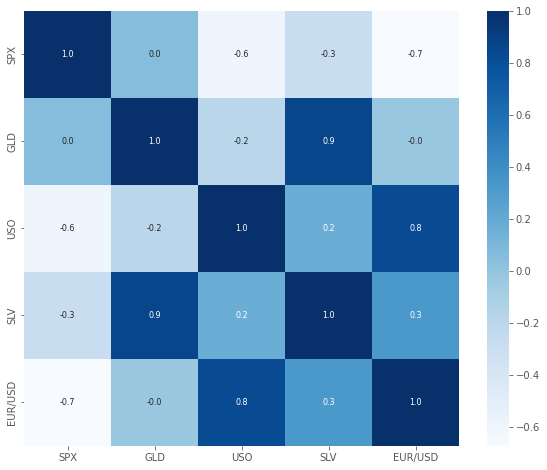

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(corellation ,cbar='True',square = 'True',annot = True ,annot_kws={'size':8},cmap='Blues',fmt='.1F')

In [133]:
corellation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Splite Data set
    </h1>
</div>

In machine learning, data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data. The original data in a machine learning model is typically taken and split into three or four sets.

In [134]:
data_set.keys()

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [135]:
X = data_set[['SPX', 'USO', 'SLV', 'EUR/USD']]

In [136]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [137]:
y = data_set['GLD']
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Createing model
    </h1>
</div>

In [139]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

<div style="background-color:#F4D03F;text-align: center;">
    <h1 style='padding-top: 20px;padding-bottom: 20px'>
        Evaluate data model
    </h1>
</div>

In [140]:
test_data_prediction = model.predict(X_test)

In [141]:
test_data_prediction

array([122.45309909, 130.21010331, 127.50940014,  96.49419743,
       118.83050055, 114.52909939, 124.80660133, 117.77209965,
       107.93370124,  98.32989955,  95.2931994 , 167.68319861,
       150.29960024, 116.49830096, 170.8193018 ,  85.37389981,
       123.07239886, 109.9655971 , 113.29030099, 131.63350304,
       124.26959912, 113.70800111, 116.16650063, 108.59809938,
       108.60280131, 125.79589922, 119.60529979, 112.27689918,
       113.46600136, 125.8645988 , 146.01530178,  89.52830004,
       167.86920016, 113.7855991 , 108.29220108, 120.26260111,
       141.66109849, 161.25310113, 173.82169777, 153.04340143,
       119.23950109, 113.27750057, 121.39899892, 113.631699  ,
       122.05820018, 107.86430073,  88.20269908, 114.50089903,
       129.84310262, 117.94410076, 104.12330049, 130.0580028 ,
       107.32439846, 160.8513036 , 131.73050071, 118.17429964,
       147.1043009 , 135.75360255,  95.54820092, 124.6146017 ,
       114.79359859,  86.20620035, 104.37599884, 113.63

In [142]:
error = r2_score(y_test,test_data_prediction)

In [143]:
error

0.9895070656581747

In [144]:
model.score(X_test,y_test)

0.9895070656581747

In [145]:
Y_test = list(y_test)

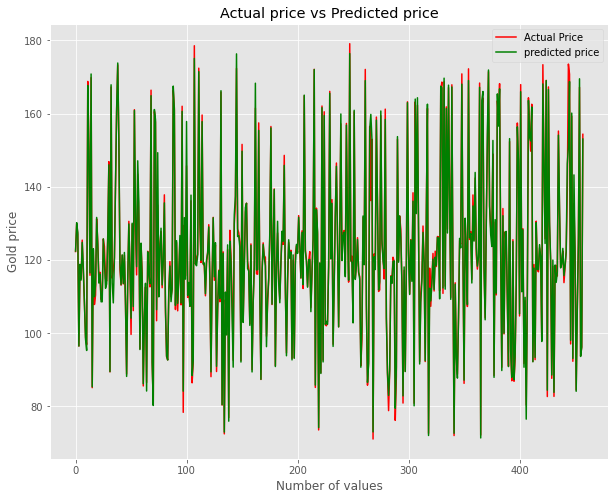

In [146]:
plt.figure(figsize=(10,8))
plt.plot(Y_test , color='red', label='Actual Price')
plt.plot(test_data_prediction , color='green', label='predicted price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()